In [83]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP9 : FACTORISATION DES ENTIERS                                             #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()

import matplotlib.pyplot as plt
import time


print("""\
# ****************************************************************************
# DIVISEURS SUCCESSIFS
# ****************************************************************************
""")



# Code

def div_successives(n):
    F = []
    d = 2
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        d = d + 1
    if n != 1:
        F.append(n)
    return  F

# We can implement a list of prime numbers since we only care when 'd + 1' is a prime number
# for that end we use the Eratosthene algorithm

# For making a list of prime smaller or equal than an integer B
def eratosthene(B):
    T = [b+2 for b in range(B-1)]

    d = 1
    j = 0
    while ( d <= sqrt(B) or j < len(T)):
        d = T[j]

        # get all multiples of d up to B
        mults = [(i)*d for i in range(2,B/d)]
        for i in mults:
            try:
                T.remove(i)
            except:
                if i > B:
                    break
                # already exceeded
        j += 1
    return T

# n is the integer we are factoring and T is the list of primes 
def div_successive_primes(n, T):
    F = []
    d = 2

    i = 0
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        # first let's use the a priori knowlodge of primes
        if (i < len(T)):
            d = T[i]
            i += 1
        # then updates d
        if (i >= len(T)):
            d += 1
    if n != 1:
        F.append(n)
    return  F

# # Affichage des resultats
n_min = 2
n_max = 10000

Time_1 = []
for n in range(n_min,n_max):
    start_time = time.time()
    divisors = div_successives(n)
    exec_time = time.time() - start_time
    Time_1.append(exec_time)
    assert(divisors==ZZ(n).prime_divisors())

P = eratosthene(int(n_max/2))

Time_2 = []
for n in range(n_min,n_max):
    start_time = time.time()
    divisors = div_successive_primes(n,P)
    exec_time = time.time() - start_time
    Time_2.append(exec_time)
    try: 
        assert(divisors==ZZ(n).prime_divisors())
    except:
        print 'n = ', n
        print 'got ', divisors
        print 'correct ',  ZZ(n).prime_divisors()
        print '\n'
# print of data
xs = [i for i in range(n_min, n_max)]

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(20, 9))

ax0.set_title('Factoring time vs integers using sucessive addition')
ax0.plot(xs, Time_1)
ax0.set_xlabel('integer')
ax0.set_ylabel('time (ms)')

ax1.set_title('Factoring time vs integers using list of succesive primes up to n_max/2')
ax1.plot(xs, Time_2)
ax1.set_xlabel('integer')
ax1.set_ylabel('time (ms)')

plt.tight_layout()
plt.show()

print 'As we can see, the algorithms tend to have an equivalent time of excecution for small values due to the if inside the implementation with primes. We will probably observe a better performance when we only use primes to factor (B-friable).'

reset()
print("""\
# ****************************************************************************
# FACTORISATION D'UN NOMBRE B-FRIABLE
# ****************************************************************************
""")
import matplotlib.pyplot as plt
import time

# Code pour l'EXERCICE

def div_successives_friable(n, P):
    F = []
    d = 2

    i = 0
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        # as n is B-friable, the following lines are garanteed
        d = P[i]
        i += 1

    if n != 1:
        F.append(n)
    return  F

n_max = 10000
n_min = 2

P = [p for p in primes(n_max)]

Times = []

for n in range(n_min,n_max):
    start_time = time.time()
    divisors = div_successives_friable(n,P)
    exec_time = time.time() - start_time
    Times.append(exec_time)
    try: 
        assert(divisors==ZZ(n).prime_divisors())
    except:
        print 'n = ', n
        print 'got ', divisors
        print 'correct ',  ZZ(n).prime_divisors()
        print '\n'

# print of data
xs = [i for i in range(n_min, n_max)]

fig = plt.figure(figsize=(20, 4.5))

ax0 = fig.add_subplot(1, 1, 1)

ax0.set_title('Factoring time vs integers using sucessive primes on B-friable number')
ax0.plot(xs, Times)
ax0.set_xlabel('integer')
ax0.set_ylabel('time (ms)')


plt.tight_layout()
plt.show()

print 'As we can see, a B-friable number factoring is much faster with the a-priori knowlodge of a prime list.'



reset()
import time

print("""\
# ****************************************************************************
# RHO DE POLLARD
# ****************************************************************************
""")


# Code pour l'EXERCICE

def f(x):
    return x^2 + 1

def myPollardrho(n, max_it = 50000):
    Zn = Zmod(n)
    # we start at 2
    x = Zn(2)
    y = x
    #x = f(x)
    g = 1
    i = 0
    #print 'i : ', i, ' x : ', x, ' y : ', y, ' gcd : ', g
    while( ( g == 1) and ( i < max_it ) ):
        x = f(x)
        y = f(f(y))
        g = gcd(int(x-y),n)
        i += 1
        #print 'i : ', i, ' x : ', x, ' y : ', y, ' gcd : ', g
        
    if ( g == n ):
        return 1
    else: 
        return g


# # Affichage des resultats

for _ in range(5):
    n=ZZ.random_element(3,200)
    print n, "| Resultat rho de Pollard : ", myPollardrho(n), " | n est-il composé ?",not n.is_prime()
    
for _ in range(5):
    n=ZZ.random_element(500,10000)
    print n, "| Resultat rho de Pollard : ", myPollardrho(n), " | n est-il composé ?",not n.is_prime()

  
    
print "\nWe can see by repeating the experiments that the method isn't always garanteed to return a correct value but it returns a correct factor most of the time!"

# factoring

n=222763
init_time = time.time()
m = n
divisors = []
fac = myPollardrho(n)
while(fac != 1):
    m = m/fac
    try:
        divisors.index(fac)
    except:
        divisors.append(fac)
    fac = myPollardrho(m)
if (m != 1):
    divisors.append(m)
exec_time = time.time() - init_time
    
L = ZZ(n).prime_divisors()
s1 = 1
for l in L:
    s1 *= l
s2 = 1
for l in divisors:
    s2 *= l

try: 
    assert(s1 == s2)
except:
    "\nfactoring didn't work..."
print "\nFactoring ", n, " gives ", divisors, " and it took ", exec_time, " seconds "




reset()
print("""\
# ****************************************************************************
# P-1 DE POLLARD
# ****************************************************************************
""")


# Code pour l'EXERCICE

def get_alpha(p,b):
    alpha = 1
    while(p^alpha <= b):
        alpha +=1
    return alpha - 1 

def myPollardpm1(n, b):
    P = [p for p in primes(b)]
    Zn = Zmod(n)
    a = Zn.random_element()
    g = gcd(int(a),n)
    i = 0
    if g > 1:
        return g
     
    for p in P:
        # calculate the greatest alpha s.t. p^alpha <= b
        alpha = get_alpha(p,b)
        for j in range(1,alpha + 1):
            a = mod(a^p,n)
    g = gcd(int(a - 1),n)
    
    if (1 < g) and (g < n):
        return g
    else:
        return 1


def try_many_pollardp1(n,b):
    while not n.is_prime():
        candidate = myPollardpm1(n,b)
        if candidate != 1:
            return candidate
    
        
# # Affichage des resultats

n=1323269

print n, "| Resultat p - 1 de Pollard : ", try_many_pollardp1(n,1000), " | n est-il composé ?",not n.is_prime()

for _ in range(5):
    n=ZZ.random_element(3,200)
    print n, "| Resultat p - 1 de Pollard : ", try_many_pollardp1(n,50), " | n est-il composé ?",not n.is_prime()



reset()
print("""\
# ****************************************************************************
# CRIBLE QUADRATIQUE
# ****************************************************************************
""")

# Code pour l'EXERCICE


def div_successives_friable(n, P):
    F = []
    d = 2

    i = 0
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        # as n is B-friable, the following lines are garanteed
        d = P[i]
        i += 1

    if n != 1:
        F.append(n)
    return  F

def calculateL(n):
    L = exp(sqrt(ln(n)*ln(ln(n))))
    return L

def f(x):
    return (x + ceil(sqrt(n)))^2-n


def cribleQuadratique(n):
    # line 1
    B = ceil(sqrt(calculateL(n)))
    # line 2
    P = [p for p in primes(B+1)]
    m = len(P)        
    F = [1 for i in range(m^3+1)]
    # line 3
    max_f = max([f(k) for k in range(0,m^3+1)])
    for p in P:
        alpha = 1
        while p^alpha <= max_f:
            for x in range(p^alpha):
                if (mod(f(x),p^alpha) == 0):
                    k = 0
                    while (x+k*p^alpha <= m^3):
                        F[x+k*p^alpha] = F[x+k*p^alpha]*p
                        k+=1
            alpha+=1
    friable_list = []
    for k in range(0,m^3+1):
        if (f(k)==F[k]):
            friable_list.append(k)
    
    
    S = []
    for i in range(m+1) :
        S += [(friable_list[i], friable_list[i]^2)]

    # line 4
    e = []
    for (x,a) in S:
        F = div_successives_friable(a,P)
        # line 5
        e.append([list(F).count(p) for p in P])
    
    # line 6
    mk = MatrixSpace(GF(2),m+1,m)(e)
    k = kernel(mk).basis()[0]

    z = 1
    y = 1
    for i in range(m+1):
        x = k[i]
        if x == 1:
            z = z * S[i][0]
            y = mod(a,n) * y
    z = mod(z,n)
    d = gcd((z-y),n)
    return d

# # Affichage des resultats

# Donnees de l'enonce de l'exercice

n=2886

print n, "| Resultat cribleQuadratique : ", cribleQuadratique(n), " | n est-il composé ?",not n.is_prime()

# *************************************************************************** #
# *************************************************************************** #
# TP9 : FACTORISATION DES ENTIERS                                             #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# DIVISEURS SUCCESSIFS
# ****************************************************************************



<Figure size 2000x900 with 2 Axes>

As we can see, the algorithms tend to have an equivalent time of excecution for small values due to the if inside the implementation with primes. We will probably observe a better performance when we only use primes to factor (B-friable).
# ****************************************************************************
# FACTORISATION D'UN NOMBRE B-FRIABLE
# ****************************************************************************



<Figure size 2000x450 with 1 Axes>

As we can see, a B-friable number factoring is much faster with the a-priori knowlodge of a prime list.
# ****************************************************************************
# RHO DE POLLARD
# ****************************************************************************

154 | Resultat rho de Pollard :  7  | n est-il composé ? True
128 | Resultat rho de Pollard :  64  | n est-il composé ? True
75 | Resultat rho de Pollard :  3  | n est-il composé ? True
6 | Resultat rho de Pollard :  3  | n est-il composé ? True
73 | Resultat rho de Pollard :  1  | n est-il composé ? False
4504 | Resultat rho de Pollard :  8  | n est-il composé ? True
3691 | Resultat rho de Pollard :  1  | n est-il composé ? False
1766 | Resultat rho de Pollard :  2  | n est-il composé ? True
1991 | Resultat rho de Pollard :  11  | n est-il composé ? True
3236 | Resultat rho de Pollard :  4  | n est-il composé ? True

We can see by repeating the experiments that the method isn't always garanteed to return a cor

# ****************************************************************************
# DIVISEURS SUCCESSIFS
# ****************************************************************************



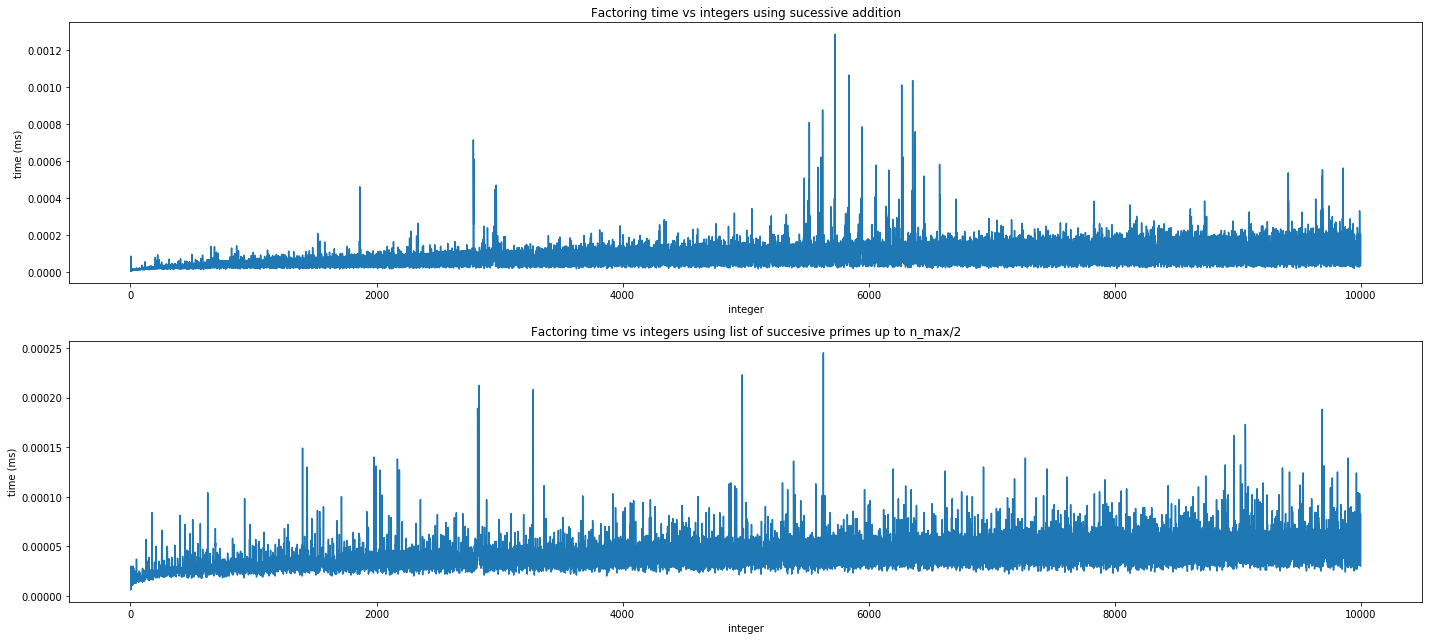

As we can see, the algorithms tend to have an equivalent time of excecution for small values due to the if inside the implementation with primes. We will probably observe a better performance when we only use primes to factor (B-friable).


In [81]:
reset()

import matplotlib.pyplot as plt
import time


print("""\
# ****************************************************************************
# DIVISEURS SUCCESSIFS
# ****************************************************************************
""")



# Code

def div_successives(n):
    F = []
    d = 2
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        d = d + 1
    if n != 1:
        F.append(n)
    return  F

# We can implement a list of prime numbers since we only care when 'd + 1' is a prime number
# for that end we use the Eratosthene algorithm

# For making a list of prime smaller or equal than an integer B
def eratosthene(B):
    T = [b+2 for b in range(B-1)]

    d = 1
    j = 0
    while ( d <= sqrt(B) or j < len(T)):
        d = T[j]

        # get all multiples of d up to B
        mults = [(i)*d for i in range(2,B/d)]
        for i in mults:
            try:
                T.remove(i)
            except:
                if i > B:
                    break
                # already exceeded
        j += 1
    return T

# n is the integer we are factoring and T is the list of primes 
def div_successive_primes(n, T):
    F = []
    d = 2

    i = 0
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        # first let's use the a priori knowlodge of primes
        if (i < len(T)):
            d = T[i]
            i += 1
        # then updates d
        if (i >= len(T)):
            d += 1
    if n != 1:
        F.append(n)
    return  F

# # Affichage des resultats
n_min = 2
n_max = 10000

Time_1 = []
for n in range(n_min,n_max):
    start_time = time.time()
    divisors = div_successives(n)
    exec_time = time.time() - start_time
    Time_1.append(exec_time)
    assert(divisors==ZZ(n).prime_divisors())

P = eratosthene(int(n_max/2))

Time_2 = []
for n in range(n_min,n_max):
    start_time = time.time()
    divisors = div_successive_primes(n,P)
    exec_time = time.time() - start_time
    Time_2.append(exec_time)
    try: 
        assert(divisors==ZZ(n).prime_divisors())
    except:
        print 'n = ', n
        print 'got ', divisors
        print 'correct ',  ZZ(n).prime_divisors()
        print '\n'
# print of data
xs = [i for i in range(n_min, n_max)]

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(20, 9))

ax0.set_title('Factoring time vs integers using sucessive addition')
ax0.plot(xs, Time_1)
ax0.set_xlabel('integer')
ax0.set_ylabel('time (ms)')

ax1.set_title('Factoring time vs integers using list of succesive primes up to n_max/2')
ax1.plot(xs, Time_2)
ax1.set_xlabel('integer')
ax1.set_ylabel('time (ms)')

plt.tight_layout()
plt.show()

print 'As we can see, the algorithms tend to have an equivalent time of excecution for small values due to the if inside the implementation with primes. We will probably observe a better performance when we only use primes to factor (B-friable).'

# ****************************************************************************
# FACTORISATION D'UN NOMBRE B-FRIABLE
# ****************************************************************************



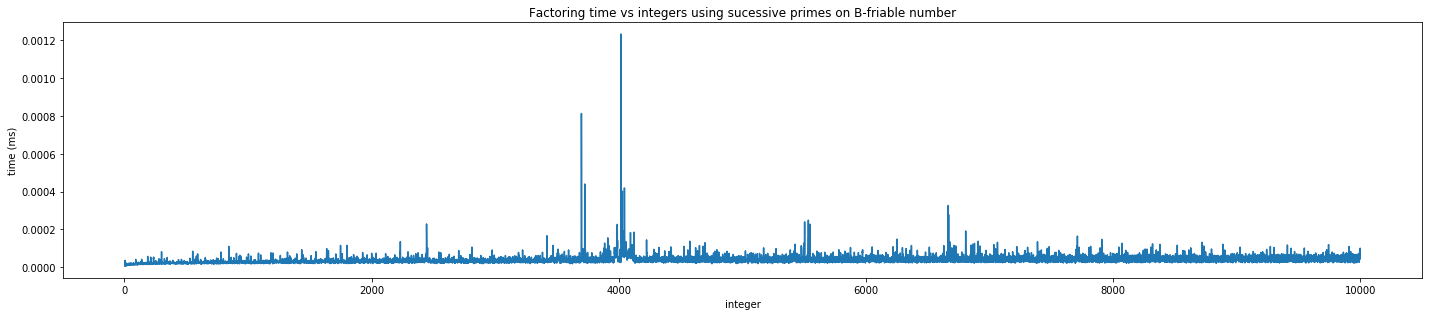

As we can see, a B-friable number factoring is much faster with the a-priori knowlodge of a prime list.


In [85]:
reset()
print("""\
# ****************************************************************************
# FACTORISATION D'UN NOMBRE B-FRIABLE
# ****************************************************************************
""")
import matplotlib.pyplot as plt
import time

# Code pour l'EXERCICE

def div_successives_friable(n, P):
    F = []
    d = 2

    i = 0
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        # as n is B-friable, the following lines are garanteed
        d = P[i]
        i += 1

    if n != 1:
        F.append(n)
    return  F

n_max = 10000
n_min = 2

P = [p for p in primes(n_max)]

Times = []

for n in range(n_min,n_max):
    start_time = time.time()
    divisors = div_successives_friable(n,P)
    exec_time = time.time() - start_time
    Times.append(exec_time)
    try: 
        assert(divisors==ZZ(n).prime_divisors())
    except:
        print 'n = ', n
        print 'got ', divisors
        print 'correct ',  ZZ(n).prime_divisors()
        print '\n'

# print of data
xs = [i for i in range(n_min, n_max)]

fig = plt.figure(figsize=(20, 4.5))

ax0 = fig.add_subplot(1, 1, 1)

ax0.set_title('Factoring time vs integers using sucessive primes on B-friable number')
ax0.plot(xs, Times)
ax0.set_xlabel('integer')
ax0.set_ylabel('time (ms)')


plt.tight_layout()
plt.show()

print 'As we can see, a B-friable number factoring is much faster with the a-priori knowlodge of a prime list.'


In [116]:
reset()
import time

print("""\
# ****************************************************************************
# RHO DE POLLARD
# ****************************************************************************
""")


# Code pour l'EXERCICE

def f(x):
    return x^2 + 1

def myPollardrho(n, max_it = 50000):
    Zn = Zmod(n)
    # we start at 2
    x = Zn(2)
    y = x
    #x = f(x)
    g = 1
    i = 0
    #print 'i : ', i, ' x : ', x, ' y : ', y, ' gcd : ', g
    while( ( g == 1) and ( i < max_it ) ):
        x = f(x)
        y = f(f(y))
        g = gcd(int(x-y),n)
        i += 1
        #print 'i : ', i, ' x : ', x, ' y : ', y, ' gcd : ', g
        
    if ( g == n ):
        return 1
    else: 
        return g


# # Affichage des resultats

for _ in range(5):
    n=ZZ.random_element(3,200)
    print n, "| Resultat rho de Pollard : ", myPollardrho(n), " | n est-il composé ?",not n.is_prime()
    
for _ in range(5):
    n=ZZ.random_element(500,10000)
    print n, "| Resultat rho de Pollard : ", myPollardrho(n), " | n est-il composé ?",not n.is_prime()

  
    
print "\nWe can see by repeating the experiments that the method isn't always garanteed to return a correct value but it returns a correct factor most of the time!"

# factoring

n=222763
init_time = time.time()
m = n
divisors = []
fac = myPollardrho(n)
while(fac != 1):
    m = m/fac
    try:
        divisors.index(fac)
    except:
        divisors.append(fac)
    fac = myPollardrho(m)
if (m != 1):
    divisors.append(m)
exec_time = time.time() - init_time
    
L = ZZ(n).prime_divisors()
s1 = 1
for l in L:
    s1 *= l
s2 = 1
for l in divisors:
    s2 *= l

try: 
    assert(s1 == s2)
except:
    "\nfactoring didn't work..."
print "\nFactoring ", n, " gives ", divisors, " and it took ", exec_time, " seconds "

# ****************************************************************************
# RHO DE POLLARD
# ****************************************************************************

37 | Resultat rho de Pollard :  1  | n est-il composé ? False
95 | Resultat rho de Pollard :  1  | n est-il composé ? True
111 | Resultat rho de Pollard :  3  | n est-il composé ? True
129 | Resultat rho de Pollard :  3  | n est-il composé ? True
41 | Resultat rho de Pollard :  1  | n est-il composé ? False
5399 | Resultat rho de Pollard :  1  | n est-il composé ? False
9486 | Resultat rho de Pollard :  3  | n est-il composé ? True
9417 | Resultat rho de Pollard :  3  | n est-il composé ? True
760 | Resultat rho de Pollard :  8  | n est-il composé ? True
5864 | Resultat rho de Pollard :  8  | n est-il composé ? True

We can see by repeating the experiments that the method isn't always garanteed to return a correct value but it returns a correct factor most of the time!

Factoring  222763  gives  [673, 331]  and i

In [37]:
reset()
print("""\
# ****************************************************************************
# P-1 DE POLLARD
# ****************************************************************************
""")


# Code pour l'EXERCICE

def get_alpha(p,b):
    alpha = 1
    while(p^alpha <= b):
        alpha +=1
    return alpha - 1 

def myPollardpm1(n, b):
    P = [p for p in primes(b)]
    Zn = Zmod(n)
    a = Zn.random_element()
    g = gcd(int(a),n)
    i = 0
    if g > 1:
        return g
     
    for p in P:
        # calculate the greatest alpha s.t. p^alpha <= b
        alpha = get_alpha(p,b)
        for j in range(1,alpha + 1):
            a = mod(a^p,n)
    g = gcd(int(a - 1),n)
    
    if (1 < g) and (g < n):
        return g
    else:
        return 1


def try_many_pollardp1(n,b):
    while not n.is_prime():
        candidate = myPollardpm1(n,b)
        if candidate != 1:
            return candidate
    
        
# # Affichage des resultats

n=1323269

print n, "| Resultat p - 1 de Pollard : ", try_many_pollardp1(n,1000), " | n est-il composé ?",not n.is_prime()

for _ in range(5):
    n=ZZ.random_element(3,200)
    print n, "| Resultat p - 1 de Pollard : ", try_many_pollardp1(n,50), " | n est-il composé ?",not n.is_prime()



# ****************************************************************************
# P-1 DE POLLARD
# ****************************************************************************

1323269 | Resultat p - 1 de Pollard :  8881  | n est-il composé ? True
167 | Resultat p - 1 de Pollard :  None  | n est-il composé ? False
130 | Resultat p - 1 de Pollard :  130  | n est-il composé ? True
92 | Resultat p - 1 de Pollard :  4  | n est-il composé ? True
185 | Resultat p - 1 de Pollard :  5  | n est-il composé ? True
176 | Resultat p - 1 de Pollard :  2  | n est-il composé ? True


In [82]:
reset()
print("""\
# ****************************************************************************
# CRIBLE QUADRATIQUE
# ****************************************************************************
""")

# Code pour l'EXERCICE


def div_successives_friable(n, P):
    F = []
    d = 2

    i = 0
    while (d^2 <= n):
        if (n%d == 0):
            F.append(d)
        while (n%d == 0):
            n = n/d
        # as n is B-friable, the following lines are garanteed
        d = P[i]
        i += 1

    if n != 1:
        F.append(n)
    return  F

def calculateL(n):
    L = exp(sqrt(ln(n)*ln(ln(n))))
    return L

def f(x):
    return (x + ceil(sqrt(n)))^2-n


def cribleQuadratique(n):
    # line 1
    B = ceil(sqrt(calculateL(n)))
    # line 2
    P = [p for p in primes(B+1)]
    m = len(P)        
    F = [1 for i in range(m^3+1)]
    # line 3
    max_f = max([f(k) for k in range(0,m^3+1)])
    for p in P:
        alpha = 1
        while p^alpha <= max_f:
            for x in range(p^alpha):
                if (mod(f(x),p^alpha) == 0):
                    k = 0
                    while (x+k*p^alpha <= m^3):
                        F[x+k*p^alpha] = F[x+k*p^alpha]*p
                        k+=1
            alpha+=1
    friable_list = []
    for k in range(0,m^3+1):
        if (f(k)==F[k]):
            friable_list.append(k)
    
    
    S = []
    for i in range(m+1) :
        S += [(friable_list[i], friable_list[i]^2)]

    # line 4
    e = []
    for (x,a) in S:
        F = div_successives_friable(a,P)
        # line 5
        e.append([list(F).count(p) for p in P])
    
    # line 6
    mk = MatrixSpace(GF(2),m+1,m)(e)
    k = kernel(mk).basis()[0]

    z = 1
    y = 1
    for i in range(m+1):
        x = k[i]
        if x == 1:
            z = z * S[i][0]
            y = mod(a,n) * y
    z = mod(z,n)
    d = gcd((z-y),n)
    return d

# # Affichage des resultats

# Donnees de l'enonce de l'exercice

n=2886

print n, "| Resultat cribleQuadratique : ", cribleQuadratique(n), " | n est-il composé ?",not n.is_prime()

 # ****************************************************************************
# CRIBLE QUADRATIQUE
# ****************************************************************************

2886 | Resultat cribleQuadratique :  3  | n est-il composé ? True
